# Machine Learning Final Project  
### John Wang

The inspiration for this project came from my failed attempts at learning Maritime Sign Language (MSL) during my time in the maritime industry. Maritime Sign Language was frequently used in the 18th and 19th century and is considered a dying method of communication, with an estimated of less than 100 native speakers. Maritime Sign Language was used aboard vessels as verbal communication was not feasible at times.
Finding a substantial Maritime Sign Lanugage dataset proved to be difficult, and in-lieu, I opted to utilize American Sign Language instead.

In [1]:
import numpy as np
import os
import pandas as pd
import cv2
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras import layers, models
import seaborn as sns
import matplotlib.pyplot as plt

## Create a function that reads and processes image from the folder/resizes them
Parameters were changed after getting an accuracy of 1.8%. Sizes were enlarged to 200x200, the most effective interpolation method was change to Inter_Area after trying Inter_Cubic, Inter_Nearest.  
  
Inter_Cubic uses 4x4 grid of pixels to estimate the new pixel values.  
  
Inter_Nearest selects the nearest pixel without any mathematical interpolations.  


In [2]:
def create_dataset(img_folder):
    img_data_array = []
    class_name = []
    for dir in os.listdir(img_folder):
        for img in os.listdir(os.path.join(img_folder, dir)):
            try:
                imagepath = os.path.join(img_folder, dir, img)
                if imagepath.split(".")[-1] == "gif":
                    continue
                image = cv2.imread(imagepath, cv2.COLOR_BGR2RGB)
                image = cv2.resize(image, (200, 200), interpolation=cv2.INTER_AREA)
                img_data_array.append(image)
                class_name.append(dir)
            except Exception as e:
                continue
    return np.array(img_data_array), class_name

### The Dataset
### Import Dataset - Downloaded from Kaggle and Modified to include from both sets

The American Sign Language Dataset was provided by Kaggle https://www.kaggle.com/datasets/grassknoted/asl-alphabet?select=asl_alphabet_train.

In [3]:
img_data,class_name=create_dataset(r"C:\Users\wooki\Documents\UChicago\UChicago Q3\Machine Learning\Final Project\asl_dataset")

In [4]:
targetClasses = {key: value for value, key in enumerate(np.unique(class_name))}
getClasses = {value: key for value, key in enumerate(np.unique(class_name))}

targetClss = [targetClasses[class_name[i]] for i in range(len(class_name))]

In [5]:
print(targetClasses)

{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'f': 15, 'g': 16, 'h': 17, 'i': 18, 'j': 19, 'k': 20, 'l': 21, 'm': 22, 'n': 23, 'o': 24, 'p': 25, 'q': 26, 'r': 27, 's': 28, 't': 29, 'u': 30, 'v': 31, 'w': 32, 'x': 33, 'y': 34, 'z': 35}


In [6]:
print(f"The size of the dataset: {len(img_data)}")
print(f"The Shape of the Dataset: {img_data.shape}")

The size of the dataset: 2515
The Shape of the Dataset: (2515, 200, 200, 3)


In [7]:
# Shuffle the data
temp = list(zip(img_data, targetClss))
np.random.shuffle(temp)
img_data, targetClss = zip(*temp)

In [8]:
# Split the data into train and test sets
x_train = np.array(img_data[:2012])
x_test = np.array(img_data[2012:])
y_train = np.array(targetClss[:2012])
y_test = np.array(targetClss[2012:])

In [9]:
print(f"Total Number of Train Data: {len(x_train)}")
print(f"Total Number of Test Data: {len(x_test)}")


Total Number of Train Data: 2012
Total Number of Test Data: 503


In [10]:
#Reshape input data
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [11]:
# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

In [12]:
print(f"Total Number of Train Data: {len(x_train)}")
print(f"Total Number of Test Data: {len(x_test)}")

Total Number of Train Data: 2012
Total Number of Test Data: 503


In [13]:
# Create the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(targetClasses), activation='softmax'))

In [14]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

**Increasing the number of epochs**  
I've ran the epochs at 5, 7 and 10. The accuracy at 5 and 7 were low during the trials, despite being 2-3 minutes faster than running the model with 10 epochs. Examining the test/train graphs, the model accuracy and losses do taper off, but have not hit double descent yet (overtraining). While looking at the graph, we can see the elbow occurs around epoch 4, and the gains plateaued, signifying overfitting. 

In [15]:
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


Epoch 1/10


C:\Users\wooki\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


63/63 [==============================] - 26s 406ms/step - loss: 3.6360 - accuracy: 0.2565 - val_loss: 1.9863 - val_accuracy: 0.4771
Epoch 2/10
63/63 [==============================] - 25s 401ms/step - loss: 1.0223 - accuracy: 0.7460 - val_loss: 0.6395 - val_accuracy: 0.8410
Epoch 3/10
63/63 [==============================] - 25s 401ms/step - loss: 0.2634 - accuracy: 0.9259 - val_loss: 0.3191 - val_accuracy: 0.9165
Epoch 4/10
63/63 [==============================] - 25s 398ms/step - loss: 0.0724 - accuracy: 0.9841 - val_loss: 0.2526 - val_accuracy: 0.9364
Epoch 5/10
63/63 [==============================] - 25s 398ms/step - loss: 0.0288 - accuracy: 0.9960 - val_loss: 0.1881 - val_accuracy: 0.9463
Epoch 6/10
63/63 [==============================] - 26s 405ms/step - loss: 0.0154 - accuracy: 0.9985 - val_loss: 0.2092 - val_accuracy: 0.9443
Epoch 7/10
63/63 [==============================] - 25s 401ms/step - loss: 0.0070 - accuracy: 1.0000 - val_loss: 0.1760 - val_accuracy: 0.9443
Epoch 8/10

In [16]:
# Save the trained model
model.save("trained_model.h5")
print("Trained model saved successfully.")

Trained model saved successfully.


In [17]:
# Print accuracy and F1 score

y_pred_probabilities = model.predict(x_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)
print(f"Accuracy of the model: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score of the model:\n{f1_score(y_test, y_pred, average=None)}")

16/16 [==============================] - 1s 66ms/step
Accuracy of the model: 0.9463220675944334
F1 Score of the model:
[0.77419355 0.93333333 0.92307692 0.96774194 0.92857143 0.94736842
 0.92857143 0.96296296 0.95238095 0.96969697 1.         0.96
 0.91666667 1.         1.         1.         0.91666667 0.96969697
 0.91666667 0.94117647 1.         1.         0.96551724 0.96296296
 0.8        1.         1.         0.94117647 0.97674419 1.
 0.92857143 0.93333333 0.90322581 0.91428571 1.         0.89655172]


## Confusion Matrix

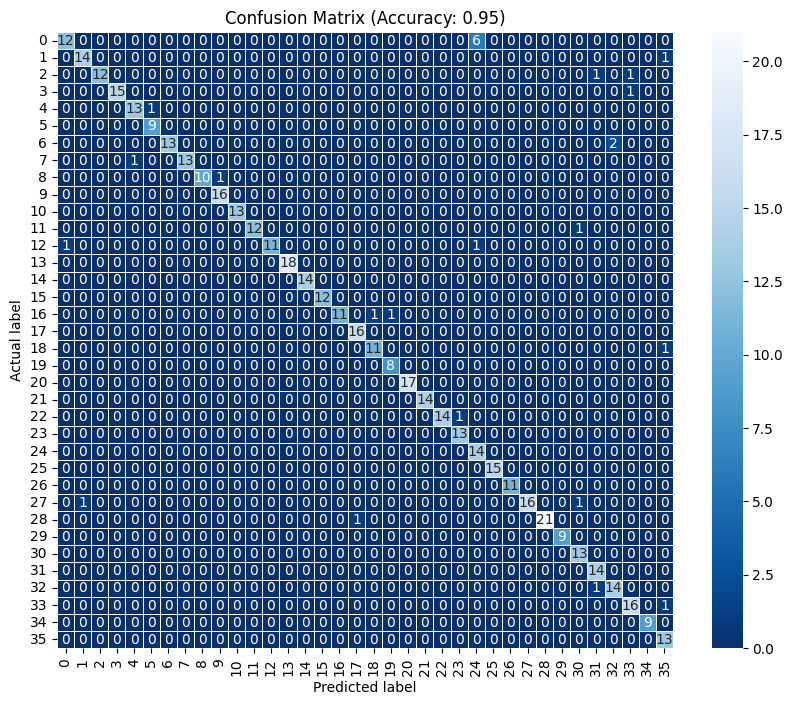

In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns

# Assuming you have the true labels (y_test) and predicted labels (y_pred)
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='.0f', linewidths=.5, square=True, cmap='Blues_r')
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title(f'Confusion Matrix (Accuracy: {accuracy:.2f})')
plt.show()


The accuracy of the model is 0.936, which is the ratio of correctly predicted instances out of all the instances. Looking at the F1 scores in the array above, we can see that the elements under a 0.8 threshold are the letters/number 'O', '1', and '6'. Upon examining the sign languages, I can tell these are easily confused for "0", "D", and "V". 

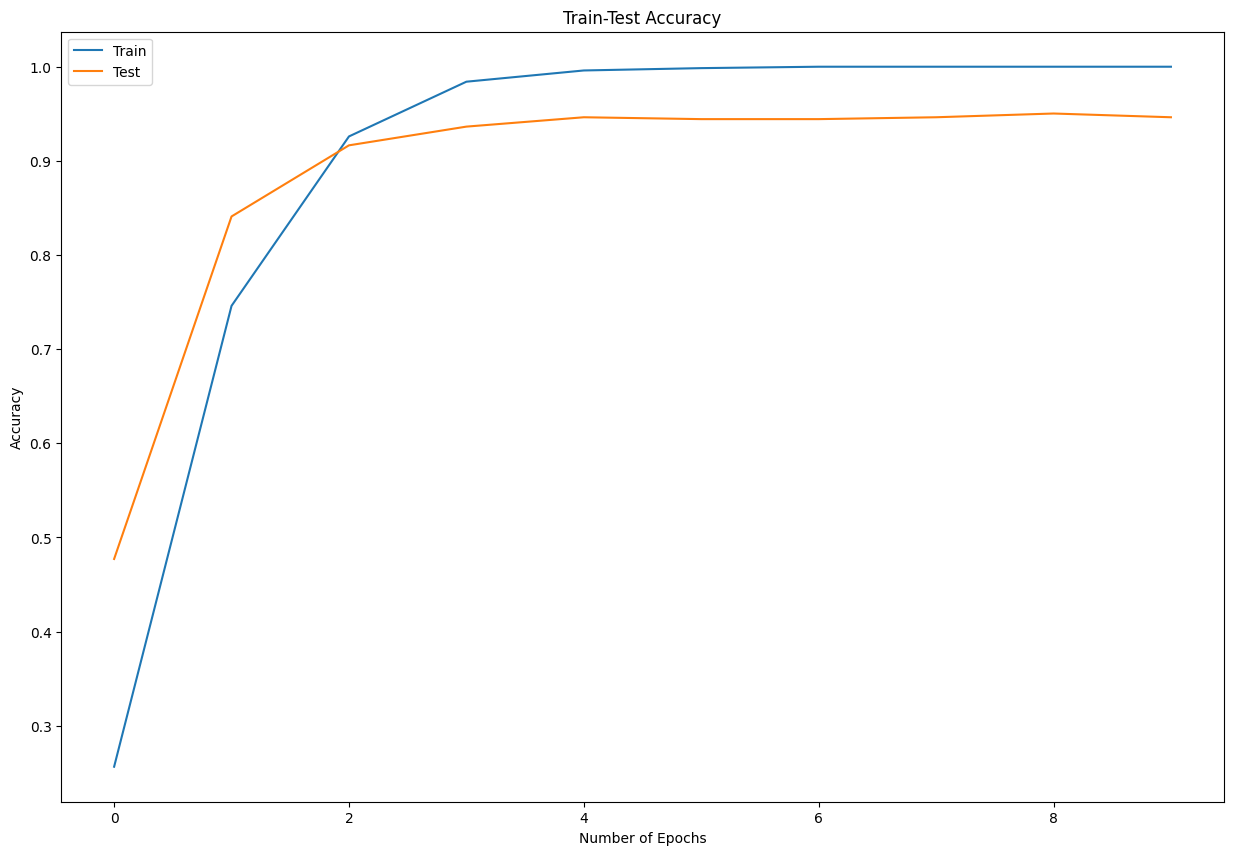

In [19]:
epochs= []
for i in range(10):
    epochs.append(i)
    
plt.figure(figsize = (15, 10))    
plt.plot(epochs,history.history['accuracy'], label="Train")
plt.plot(epochs,history.history['val_accuracy'], label="Test")
plt.title("Train-Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Test starts at 0.45 at epoch 0, intersects train at epoch 2 at 0.85, and tapers off for the rest of the epochs at 0.9. For Train, it starts at about 0.2 andrises until epoch 4, and tapers off at about 1 for the remaining epochs

The test accuracy starts at 0.45 in epoch 0, indicating a relatively low initial performance. It then increases and intersects with the train accuracy curve at epoch 2, reaching 0.85. This intersection suggests that the model's performance on the test data has improved and is now comparable to its performance on the train data. After the intersection, the test accuracy continues to increase but at a slower rate, eventually tapering off at 0.9 for the remaining epochs. This suggests that the model's performance on the test data has reached a plateau and is relatively stable.  
  
The train accuracy starts at approximately 0.2, indicating a relatively low initial performance. It then steadily increases and reaches about 1 at epoch 4. This indicates that the model's performance on the train data improves significantly during the initial epochs. However, after epoch 4, the train accuracy tapers off and remains at around 1 for the remaining epochs. This suggests that the model has learned the train data well and has likely started to overfit, as it achieves near-perfect accuracy on the train data but does not further improve.

# Train-Test Loss Graph

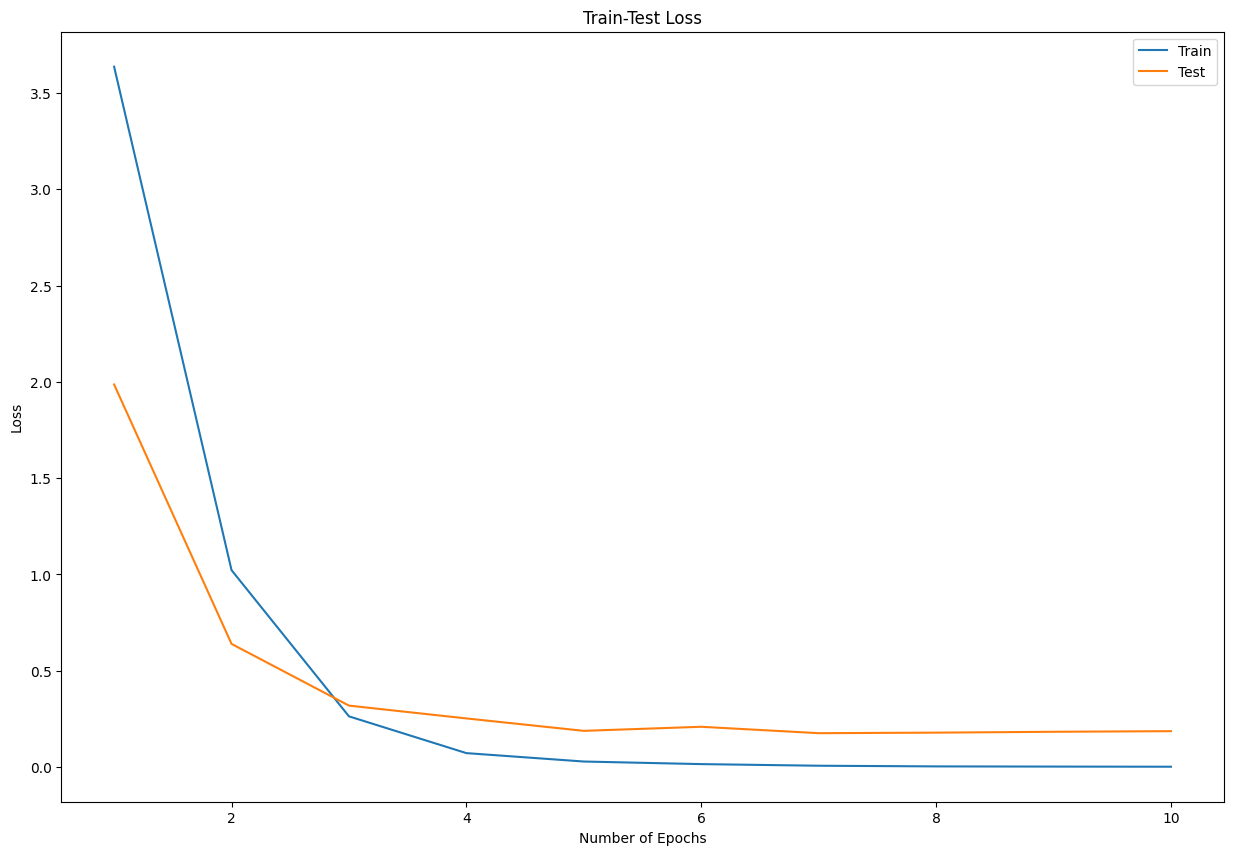

In [20]:
# Plot train-test loss graph
epochs = range(1, len(history.history['loss']) + 1)
plt.figure(figsize=(15, 10))
plt.plot(epochs, history.history['loss'], label="Train")
plt.plot(epochs, history.history['val_loss'], label="Test")
plt.title("Train-Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

## Testing model with files (hello, and machlearn)

In [41]:
# Load the images from the directory
def load_images_from_directory(directory):
    img_data_array = []
    file_names = []
    for filename in os.listdir(directory):
        if filename.endswith(".jpg") or filename.endswith(".png") or filename.endswith(".jpeg"):
            file_path = os.path.join(directory, filename)
            image = cv2.imread(file_path, cv2.COLOR_BGR2RGB)
            image = cv2.resize(image, (200, 200), interpolation=cv2.INTER_AREA)
            img_data_array.append(image)
            file_names.append(filename)
    return np.array(img_data_array), file_names


In [42]:
# Directory path containing images for prediction
predict_directory = r"C:\Users\wooki\Documents\UChicago\UChicago Q3\Machine Learning\Final Project\Trial2"
predict_data, file_names = load_images_from_directory(predict_directory)


1/1 [==============================] - 0s 52ms/step
Image: 1.jpeg - Predicted Label: h


C:\Users\wooki\AppData\Local\Programs\Python\Python311\Lib\site-packages\tensorflow\python\data\ops\structured_function.py:254: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


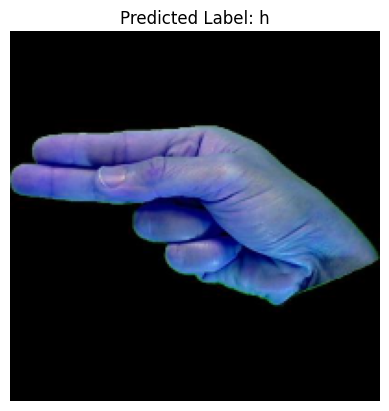

Image: 2.jpeg - Predicted Label: e


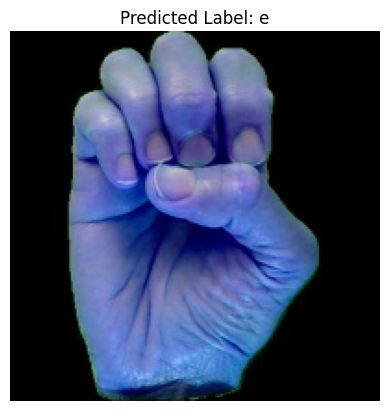

Image: 3.jpeg - Predicted Label: l


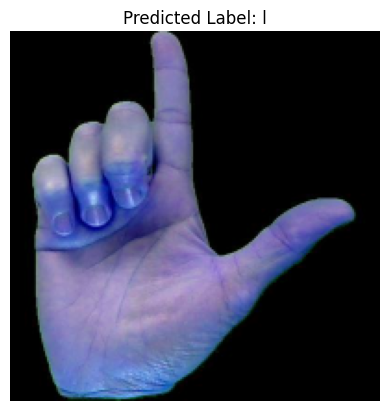

Image: 4.jpeg - Predicted Label: l


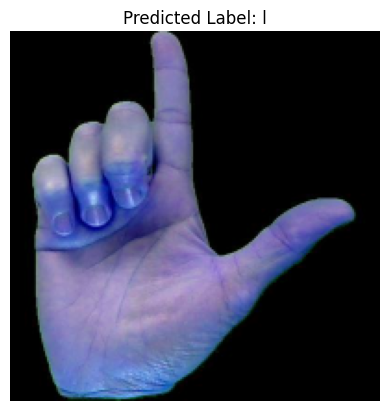

Image: 5.jpeg - Predicted Label: o


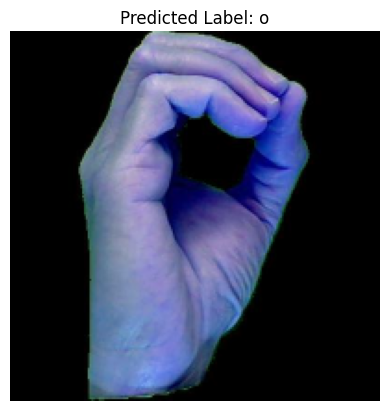

In [43]:
# Normalize pixel values
predict_data = predict_data / 255.0

# Load the trained model
trained_model = models.load_model("trained_model.h5")

# Enable eager execution
tf.config.run_functions_eagerly(True)

# Make predictions using the trained model
predicted_probabilities = trained_model.predict(predict_data)
predictions = np.argmax(predicted_probabilities, axis=1)

# Map the predicted classes to their respective labels
predicted_labels = [getClasses[prediction] for prediction in predictions]

# Print the predicted labels for each image and display the images
for filename, label, image in zip(file_names, predicted_labels, predict_data):
    print(f"Image: {filename} - Predicted Label: {label}")
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Predicted Label: {label}")
    plt.axis('off')
    plt.show()

# Disable eager execution
tf.config.run_functions_eagerly(False)

In [44]:
print(predicted_labels)

['h', 'e', 'l', 'l', 'o']


In [45]:
# Directory path containing images for prediction
predict_directory = r"C:\Users\wooki\Documents\UChicago\UChicago Q3\Machine Learning\Final Project\Trial"
predict_data, file_names = load_images_from_directory(predict_directory)


1/1 [==============================] - 0s 62ms/step
Image: 1.jpeg - Predicted Label: m


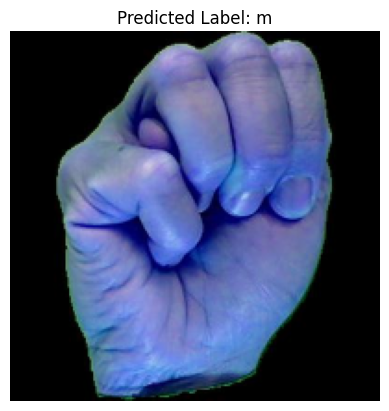

Image: 2.jpeg - Predicted Label: a


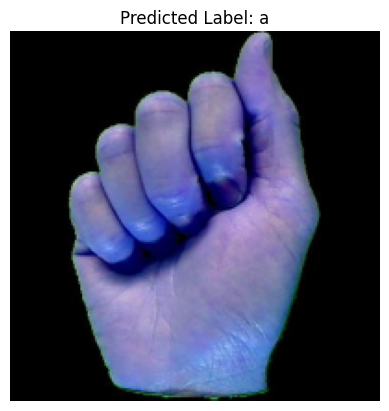

Image: 3.jpeg - Predicted Label: c


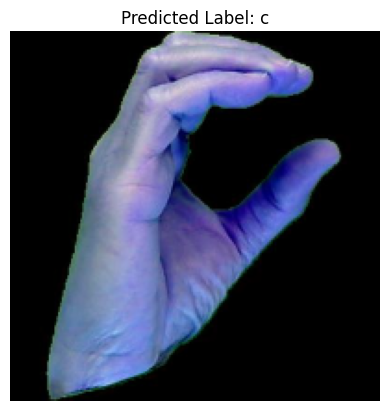

Image: 4.jpeg - Predicted Label: h


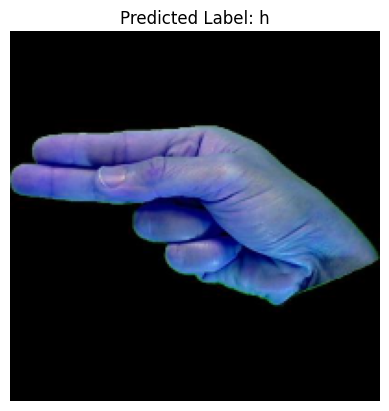

Image: 5.jpeg - Predicted Label: l


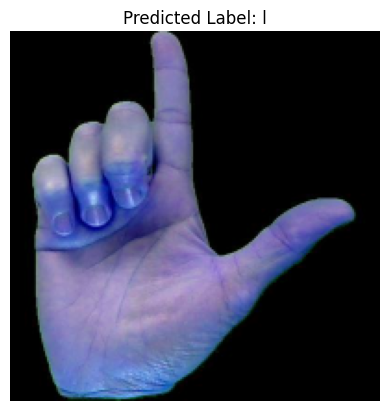

Image: 6.jpeg - Predicted Label: e


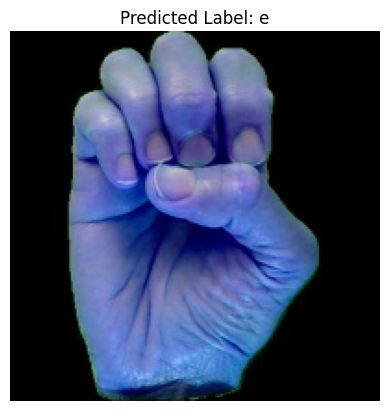

Image: 7.jpeg - Predicted Label: a


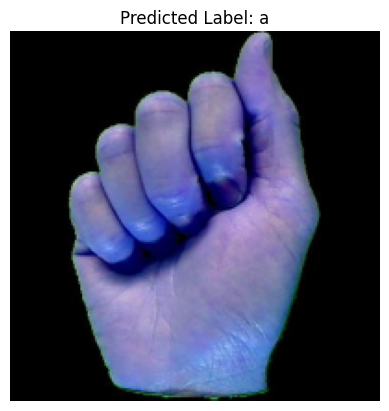

Image: 8.jpeg - Predicted Label: r


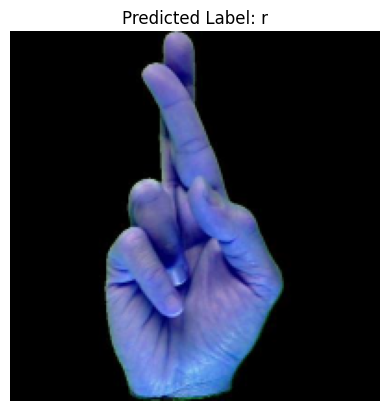

Image: 9.jpeg - Predicted Label: n


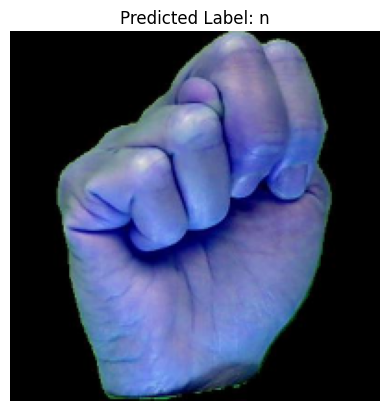

In [46]:
# Normalize pixel values
predict_data = predict_data / 255.0

# Load the trained model
trained_model = models.load_model("trained_model.h5")

# Enable eager execution
tf.config.run_functions_eagerly(True)

# Make predictions using the trained model
predicted_probabilities = trained_model.predict(predict_data)
predictions = np.argmax(predicted_probabilities, axis=1)

# Map the predicted classes to their respective labels
predicted_labels = [getClasses[prediction] for prediction in predictions]

# Print the predicted labels for each image and display the images
for filename, label, image in zip(file_names, predicted_labels, predict_data):
    print(f"Image: {filename} - Predicted Label: {label}")
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(f"Predicted Label: {label}")
    plt.axis('off')
    plt.show()

# Disable eager execution
tf.config.run_functions_eagerly(False)

In [47]:
print(predicted_labels)

['m', 'a', 'c', 'h', 'l', 'e', 'a', 'r', 'n']


### Testing different hyperparameters

In [34]:
# Create the CNN model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(targetClasses), activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history1 = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))
model.save("trained_model1.h5")
print("Trained model saved successfully.")

Epoch 1/5
63/63 [==============================] - 26s 404ms/step - loss: 2.9363 - accuracy: 0.2634 - val_loss: 1.9344 - val_accuracy: 0.4235
Epoch 2/5
63/63 [==============================] - 25s 396ms/step - loss: 1.1120 - accuracy: 0.6779 - val_loss: 0.7427 - val_accuracy: 0.7813
Epoch 3/5
63/63 [==============================] - 25s 403ms/step - loss: 0.3730 - accuracy: 0.8912 - val_loss: 0.4281 - val_accuracy: 0.8688
Epoch 4/5
63/63 [==============================] - 25s 399ms/step - loss: 0.1663 - accuracy: 0.9518 - val_loss: 0.3158 - val_accuracy: 0.8926
Epoch 5/5
63/63 [==============================] - 25s 402ms/step - loss: 0.0903 - accuracy: 0.9751 - val_loss: 0.2325 - val_accuracy: 0.9245
Trained model saved successfully.


In [35]:
# Print accuracy and F1 score

y_pred_probabilities = model.predict(x_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)
print(f"Accuracy of the model: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score of the model:\n{f1_score(y_test, y_pred, average=None)}")

16/16 [==============================] - 1s 69ms/step
Accuracy of the model: 0.9244532803180915
F1 Score of the model:
[0.72222222 0.96774194 0.84615385 0.96774194 0.92307692 1.
 0.88888889 0.92857143 1.         0.9375     0.92857143 0.96
 0.96       0.94736842 0.92857143 0.96       0.96       1.
 1.         0.94117647 0.97142857 1.         0.93333333 0.89655172
 0.68965517 1.         1.         0.875      0.84210526 0.9
 0.89655172 0.89655172 0.90909091 0.96969697 0.94736842 0.92307692]


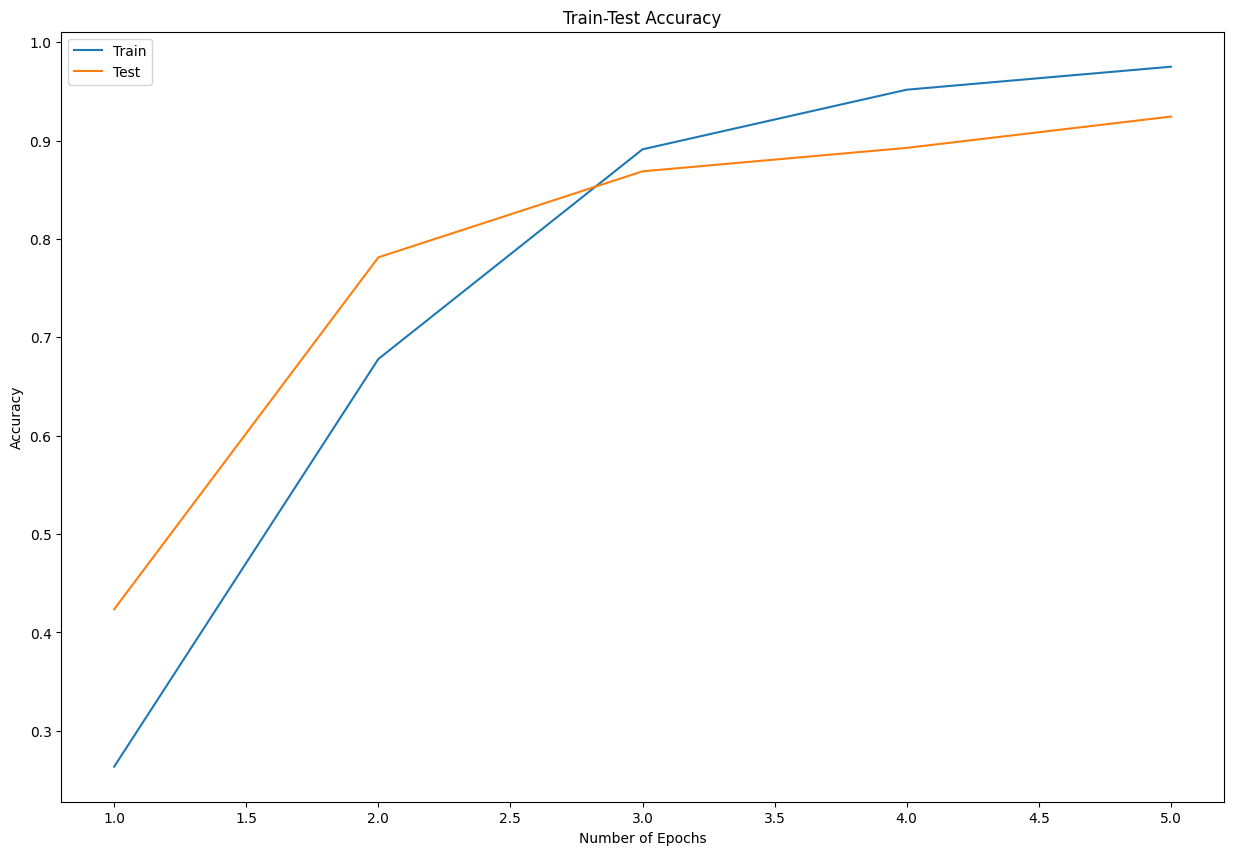

In [36]:
# Plot the train-test accuracy
epochs = range(1, len(history1.history['accuracy']) + 1)
plt.figure(figsize=(15, 10))
plt.plot(epochs, history1.history['accuracy'], label="Train")
plt.plot(epochs, history1.history['val_accuracy'], label="Test")
plt.title("Train-Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [37]:
import matplotlib.pyplot as plt

# Create the CNN model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)))
model.add(tf.keras.layers.MaxPooling2D((2, 2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(len(targetClasses), activation='softmax'))

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train the model
history1 = model.fit(x_train, y_train, epochs=7, validation_data=(x_test, y_test))

# Save the trained model
model.save("trained_model1.h5")
print("Trained model saved successfully.")




Epoch 1/7


C:\Users\wooki\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\backend.py:5612: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


63/63 [==============================] - 26s 403ms/step - loss: 2.6845 - accuracy: 0.4374 - val_loss: 0.8629 - val_accuracy: 0.7714
Epoch 2/7
63/63 [==============================] - 25s 395ms/step - loss: 0.3890 - accuracy: 0.8931 - val_loss: 0.4195 - val_accuracy: 0.8847
Epoch 3/7
63/63 [==============================] - 25s 397ms/step - loss: 0.0977 - accuracy: 0.9806 - val_loss: 0.2139 - val_accuracy: 0.9384
Epoch 4/7
63/63 [==============================] - 25s 395ms/step - loss: 0.0350 - accuracy: 0.9920 - val_loss: 0.2082 - val_accuracy: 0.9384
Epoch 5/7
63/63 [==============================] - 25s 398ms/step - loss: 0.0106 - accuracy: 0.9995 - val_loss: 0.1610 - val_accuracy: 0.9463
Epoch 6/7
63/63 [==============================] - 25s 393ms/step - loss: 0.0042 - accuracy: 1.0000 - val_loss: 0.1702 - val_accuracy: 0.9483
Epoch 7/7
63/63 [==============================] - 25s 397ms/step - loss: 0.0026 - accuracy: 1.0000 - val_loss: 0.1620 - val_accuracy: 0.9523
Trained model sa

In [38]:
# Print accuracy and F1 score

y_pred_probabilities = model.predict(x_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)
print(f"Accuracy of the model: {accuracy_score(y_test, y_pred)}")
print(f"F1 Score of the model:\n{f1_score(y_test, y_pred, average=None)}")

16/16 [==============================] - 1s 67ms/step
Accuracy of the model: 0.952286282306163
F1 Score of the model:
[0.88235294 0.93333333 0.85714286 0.96969697 0.92857143 0.94736842
 0.88888889 0.96296296 0.95238095 1.         1.         0.92307692
 1.         0.94736842 0.96551724 1.         0.96       1.
 0.95652174 1.         1.         1.         0.96774194 1.
 0.86666667 0.96774194 1.         0.90909091 0.97674419 1.
 0.88888889 0.96551724 0.90909091 0.96969697 0.88888889 0.92307692]


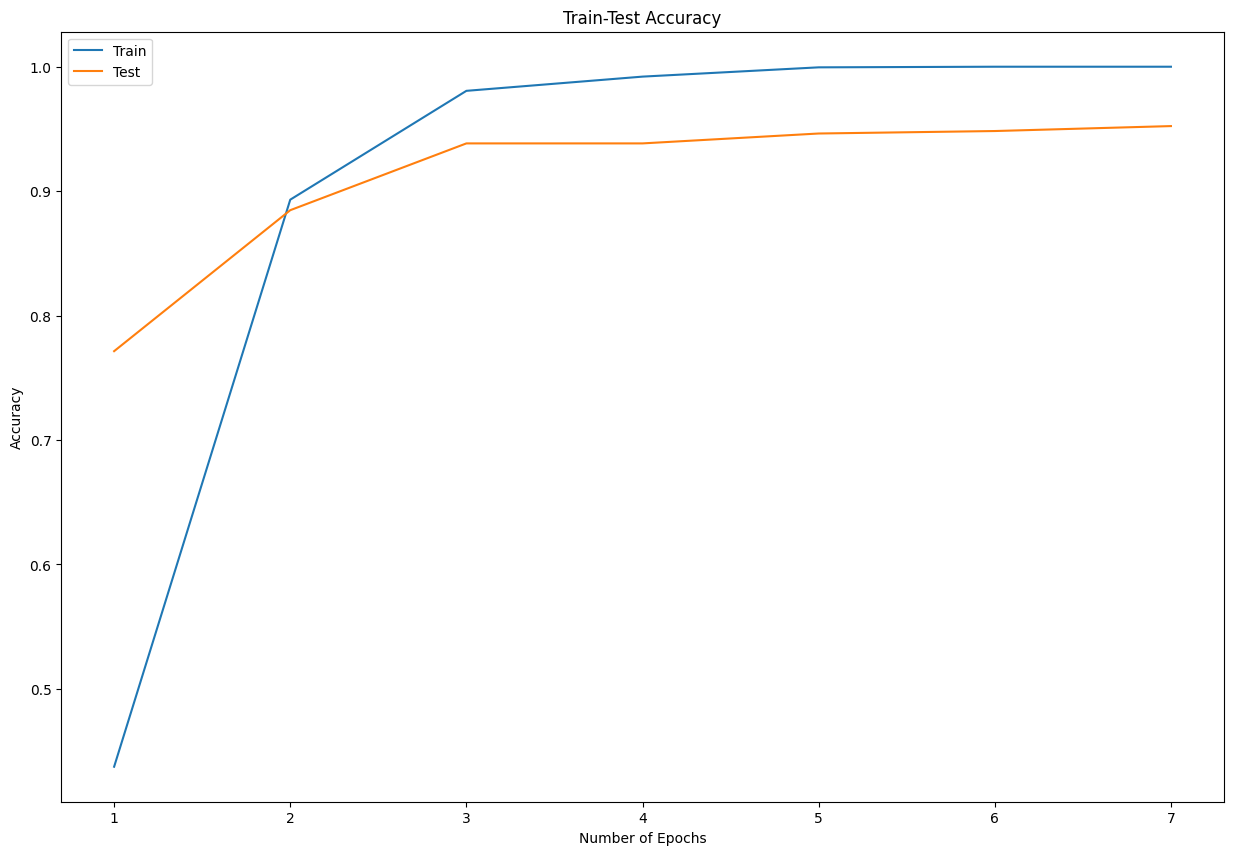

In [39]:
# Plot the train-test accuracy
epochs = range(1, len(history1.history['accuracy']) + 1)
plt.figure(figsize=(15, 10))
plt.plot(epochs, history1.history['accuracy'], label="Train")
plt.plot(epochs, history1.history['val_accuracy'], label="Test")
plt.title("Train-Test Accuracy")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

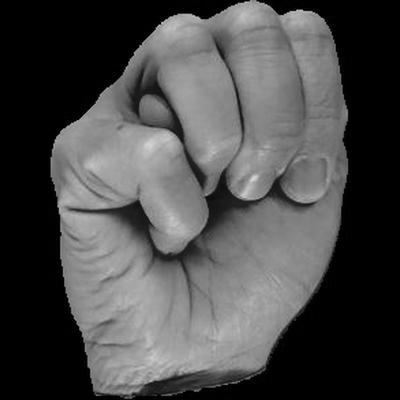

In [50]:
## Making sure images are pulled in as BW/RGB/BGW
from PIL import Image

# Open the image
image = Image.open(r"C:\Users\wooki\Documents\UChicago\UChicago Q3\Machine Learning\Final Project\Trial\1.jpeg")

# Convert the image to black and white
bw_image = image.convert("L")

# Save the black and white image
bw_image
